In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import tensorflow as tf
import tensorflow.keras.layers as tfl

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
def display_images(data, no_img_mask):
    
    # Load the images from the files
    images = glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraRGB/*.png')[:no_img_mask]
    masks = glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraSeg/*.png')[:no_img_mask]

    for i in range(len(images)):
        images[i] = cv2.imread(images[i])
        masks[i] = cv2.imread(masks[i], cv2.IMREAD_GRAYSCALE)



    fig, axes = plt.subplots(no_img_mask, 2)

    for i in range(len(images)):
        axes[i][0].imshow(images[i])
        axes[i][1].imshow(masks[i])

    # Show the plot
    plt.show()

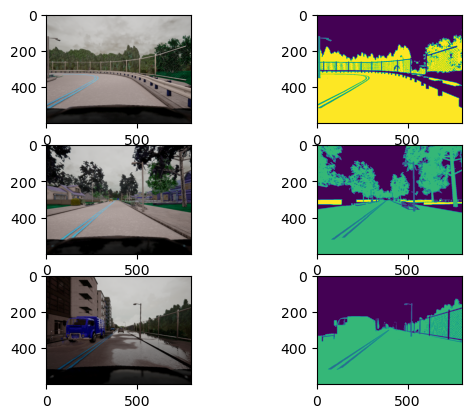

In [3]:
display_images('dataA', 3)

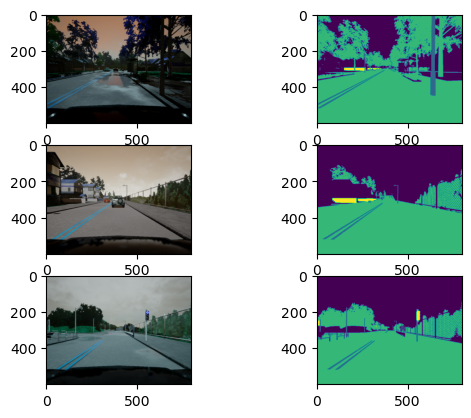

In [4]:
display_images('dataB', 3)

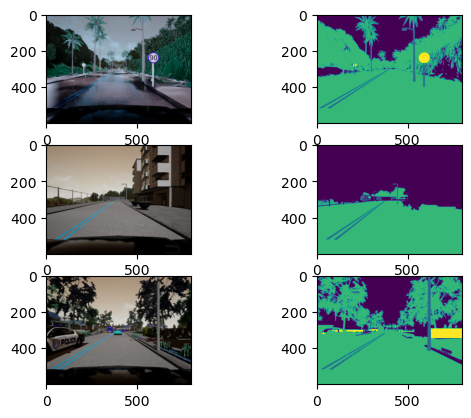

In [5]:
display_images('dataC', 3)

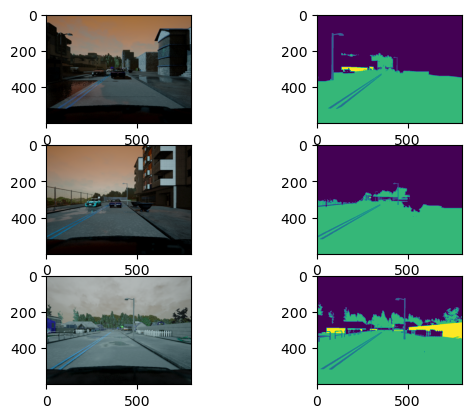

In [6]:
display_images('dataD', 3)

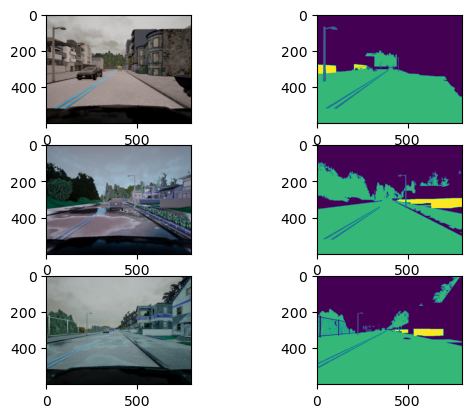

In [7]:
display_images('dataE', 3)

In [8]:
images_list = []
masks_list = []
def store_imgs_masks(data):
    images_list.append(glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraRGB/*.png'))
    masks_list.append(glob.glob('/kaggle/input/lyft-udacity-challenge/'+data+'/'+data+'/CameraSeg/*.png'))


In [9]:
store_imgs_masks('dataA')
store_imgs_masks('dataB')
store_imgs_masks('dataC')
store_imgs_masks('dataD')
store_imgs_masks('dataE')

In [10]:
print(images_list[0][:5],'\n')
print(masks_list[0][:5])

['/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F6-50.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F2-90.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_161.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_090.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_040.png'] 

['/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F6-50.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F2-90.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_161.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_090.png', '/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_040.png']


In [11]:
def get_one_list(list_of_lists):
    
    one_list = []

    for sublist in list_of_lists:
        one_list.extend(sublist)
    return one_list

In [12]:
images_list = get_one_list(images_list)
masks_list = get_one_list(masks_list)

In [13]:
print(images_list[50], '\n')
print(masks_list[50])

/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F62-70.png 

/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F62-70.png


In [14]:
image_list_ds = tf.data.Dataset.list_files(images_list, shuffle=False)
mask_list_ds = tf.data.Dataset.list_files(masks_list, shuffle=False)

for path in zip(image_list_ds.take(3), mask_list_ds.take(3)):
    print(path)

(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_000.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_000.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_001.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_001.png'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/02_00_010.png'>, <tf.Tensor: shape=(), dtype=string, numpy=b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/02_00_010.png'>)


In [15]:
image_filenames = tf.constant(images_list)
masks_filenames = tf.constant(masks_list)
dataset = tf.data.Dataset.from_tensor_slices((image_filenames, masks_filenames))

for image, mask in dataset.take(1):
    print(image)
    print(mask)

tf.Tensor(b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraRGB/F6-50.png', shape=(), dtype=string)
tf.Tensor(b'/kaggle/input/lyft-udacity-challenge/dataA/dataA/CameraSeg/F6-50.png', shape=(), dtype=string)


In [16]:
def process_path(image_path, mask_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=3)
    mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
    return img, mask

def preprocess(image, mask):
    input_image = tf.image.resize(image, (192, 256), method='nearest')
    input_mask = tf.image.resize(mask, (192, 256), method='nearest')

    return input_image, input_mask

image_ds = dataset.map(process_path)
processed_image_ds = image_ds.map(preprocess)

In [17]:
"""uniques = set()

for img, mask in image_ds.take(5000):
    uniques.update(np.unique(mask.numpy()))
    
print(uniques)"""

'uniques = set()\n\nfor img, mask in image_ds.take(5000):\n    uniques.update(np.unique(mask.numpy()))\n    \nprint(uniques)'

### I will build three architectures to see the difference among all of them and how the accuracy gets improved

In [18]:
def conv_block(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    
    if dropout_prob > 0:
        conv = tfl.Dropout(dropout_prob)(conv)
        
    if max_pooling:
        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(conv)
        
    else:
        next_layer = conv
        
    skip_connection = conv
    
    return next_layer, skip_connection

In [19]:
def conv_block_2(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(inputs)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    
    if dropout_prob > 0:
        layer = tfl.Dropout(dropout_prob)(layer)
        
    if max_pooling:
        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(layer)
        
    else:
        next_layer = layer
        
    skip_connection = layer
    
    return next_layer, skip_connection

In [20]:
def conv_block_3(inputs=None, n_filters=32, dropout_prob=0, max_pooling=True):
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(inputs)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    if dropout_prob > 0:
        layer = tfl.Dropout(dropout_prob)(layer)
        
    if max_pooling:
        next_layer = tfl.MaxPooling2D(pool_size=(2,2))(layer)
        
    else:
        next_layer = layer
        
    skip_connection = layer
    
    return next_layer, skip_connection

In [21]:
def upsampling_block(expansive_input, contractive_input, n_filters=32):
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge)
    conv = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    return conv

In [22]:
def upsampling_block_2(expansive_input, contractive_input, n_filters=32):
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(merge)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    return layer

In [23]:
def upsampling_block_3(expansive_input, contractive_input, n_filters=32):
    up = tfl.Conv2DTranspose(n_filters, 3, strides=(2,2), padding='same')(expansive_input)
    merge = tfl.concatenate([up, contractive_input], axis=3)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(merge)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    return layer

In [24]:
def unet_model(input_size=(96,128,3), n_filters=32, n_classes = 13):
    inputs = tfl.Input(input_size)
    
    cblock1 = conv_block(inputs, n_filters)
    
    cblock2 = conv_block(cblock1[0], n_filters * 2)
    cblock3 = conv_block(cblock2[0], n_filters * 4)
    cblock4 = conv_block(cblock3[0], n_filters * 8, dropout_prob=0.3)
    
    cblock5 = conv_block(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)
    
    ublock6 = upsampling_block(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block(ublock8, cblock1[1], n_filters)
    
    conv9 = tfl.Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(ublock9)
    conv10 = tfl.Conv2D(n_classes, 1, padding='same')(conv9)
    
    model = tf.keras.Model(inputs=inputs, outputs=conv10)
    
    return model

In [25]:
def unet_model2(input_size=(96,128,3), n_filters=32, n_classes = 13):
    inputs = tfl.Input(input_size)
    
    cblock1 = conv_block_2(inputs, n_filters)
    
    cblock2 = conv_block_2(cblock1[0], n_filters * 2)
    cblock3 = conv_block_2(cblock2[0], n_filters * 4)
    cblock4 = conv_block_2(cblock3[0], n_filters * 8, dropout_prob=0.3)
    
    cblock5 = conv_block_2(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)
    
    ublock6 = upsampling_block_2(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block_2(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block_2(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block_2(ublock8, cblock1[1], n_filters)
    
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(ublock9)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    layer = tfl.Conv2D(n_classes, 1, padding='same')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.ReLU()(layer)
    
    model = tf.keras.Model(inputs=inputs, outputs=layer)
    
    return model

In [26]:
def unet_model3(input_size=(96,128,3), n_filters=32, n_classes = 13):
    inputs = tfl.Input(input_size)
    
    cblock1 = conv_block_3(inputs, n_filters)
    
    cblock2 = conv_block_3(cblock1[0], n_filters * 2)
    cblock3 = conv_block_3(cblock2[0], n_filters * 4)
    cblock4 = conv_block_3(cblock3[0], n_filters * 8, dropout_prob=0.3)
    
    cblock5 = conv_block_3(cblock4[0], n_filters * 16, dropout_prob=0.3, max_pooling=False)
    
    ublock6 = upsampling_block_3(cblock5[0], cblock4[1], n_filters * 8)
    ublock7 = upsampling_block_3(ublock6, cblock3[1], n_filters * 4)
    ublock8 = upsampling_block_3(ublock7, cblock2[1], n_filters * 2)
    ublock9 = upsampling_block_3(ublock8, cblock1[1], n_filters)
    
    layer = tfl.Conv2D(n_filters, 3, padding='same', kernel_initializer='he_normal')(ublock9)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    layer = tfl.Conv2D(n_classes, 1, padding='same')(layer)
    layer = tfl.BatchNormalization(axis=3)(layer,training=True)
    layer = tfl.LeakyReLU()(layer)
    
    model = tf.keras.Model(inputs=inputs, outputs=layer)
    
    return model

In [27]:
img_height = 192
img_width = 256
num_channels = 3

unet = unet_model((img_height, img_width, num_channels))
unet2 = unet_model2((img_height, img_width, num_channels))
unet3 = unet_model3((img_height, img_width, num_channels))

In [28]:
unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 192, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 192, 256, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [29]:
unet2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 192, 256, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 192, 256, 32  128        ['conv2d_20[0][0]']              
 alization)                     )                                                           

In [30]:
unet3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_40 (Conv2D)             (None, 192, 256, 32  896         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_20 (BatchN  (None, 192, 256, 32  128        ['conv2d_40[0][0]']              
 ormalization)                  )                                                           

In [31]:
unet.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
unet2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
unet3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

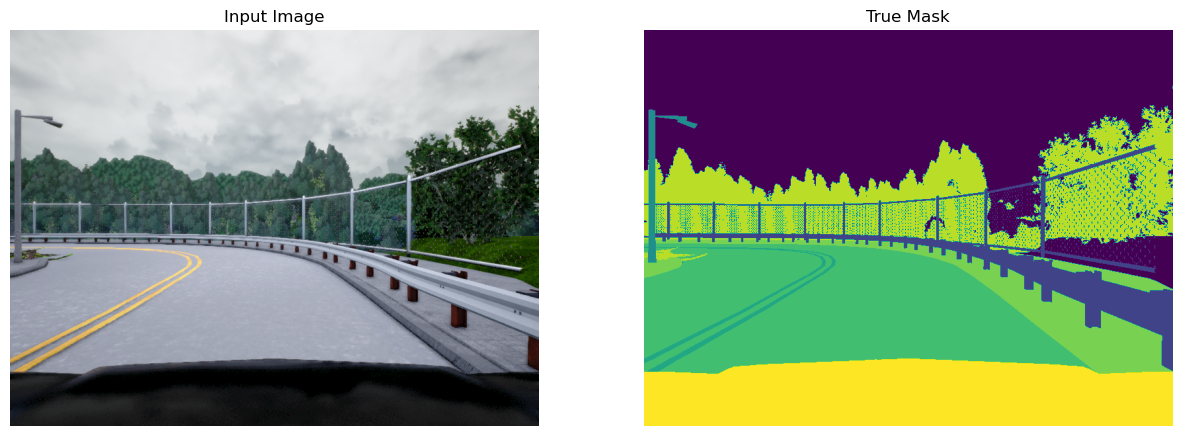

In [33]:
for image, mask in image_ds.take(1):
    sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

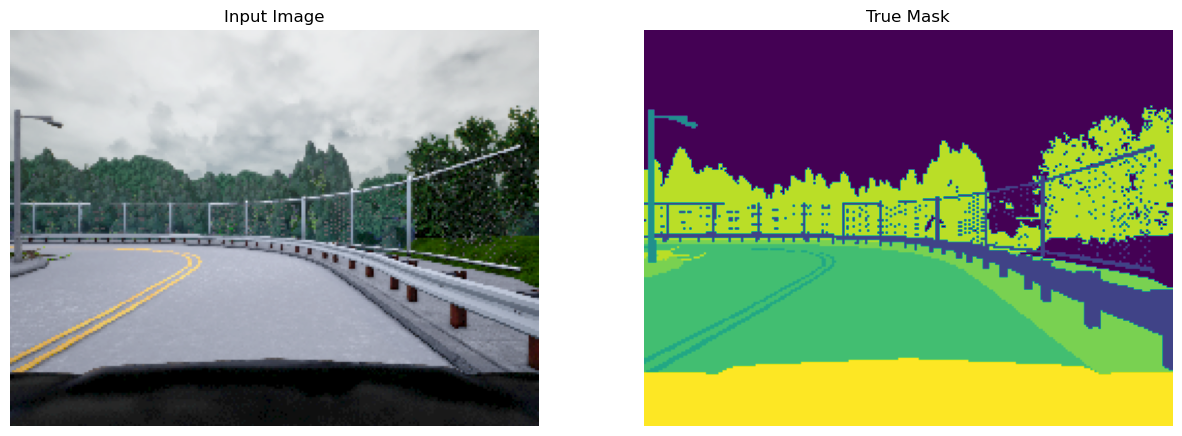

In [34]:
for image, mask in processed_image_ds.take(1):
    sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

In [35]:
EPOCHS = 50
BUFFER_SIZE = 1000
BATCH_SIZE = 64
map_dataset = processed_image_ds.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# Splitting data to training set and val set
num_samples = map_dataset.reduce(0, lambda x, _: x + 1).numpy()
train_dataset = map_dataset.take(int(0.8 * num_samples))
val_dataset = map_dataset.skip(int(0.8 * num_samples))
print(processed_image_ds)
# ReduceLROnPlateau and EarlyStopping callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=1, min_lr=1e-6)
early_stop = tf.keras.callbacks.EarlyStopping(patience=2)

<_MapDataset element_spec=(TensorSpec(shape=(192, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(192, 256, 1), dtype=tf.uint8, name=None))>


In [36]:
model_history1 = unet.fit(train_dataset,validation_data=val_dataset, epochs=EPOCHS, callbacks=[reduce_lr,early_stop])

Epoch 1/50


2023-07-26 05:18:37.374379: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


63/63 [==============================] - 69s 692ms/step - loss: 44428652.0000 - accuracy: 0.2111 - val_loss: 21344.6777 - val_accuracy: 0.2298 - lr: 0.0010
Epoch 2/50
63/63 [==============================] - 42s 675ms/step - loss: 5265923.0000 - accuracy: 0.2302 - val_loss: 549595.3125 - val_accuracy: 0.1931 - lr: 0.0010
Epoch 3/50
63/63 [==============================] - 42s 671ms/step - loss: 10434.5635 - accuracy: 0.1842 - val_loss: 690443.5625 - val_accuracy: 0.1817 - lr: 0.0010


In [37]:
model_history2 = unet2.fit(train_dataset,validation_data=val_dataset, epochs=EPOCHS, callbacks=[reduce_lr,early_stop])

Epoch 1/50


2023-07-26 05:21:29.503465: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


63/63 [==============================] - 74s 894ms/step - loss: 1.4430 - accuracy: 0.7713 - val_loss: 1.0945 - val_accuracy: 0.8965 - lr: 0.0010
Epoch 2/50
63/63 [==============================] - 55s 878ms/step - loss: 0.9976 - accuracy: 0.9079 - val_loss: 0.9116 - val_accuracy: 0.9202 - lr: 0.0010
Epoch 3/50
63/63 [==============================] - 55s 870ms/step - loss: 0.8503 - accuracy: 0.9267 - val_loss: 0.7907 - val_accuracy: 0.9331 - lr: 0.0010
Epoch 4/50
63/63 [==============================] - 55s 873ms/step - loss: 0.7503 - accuracy: 0.9370 - val_loss: 0.7018 - val_accuracy: 0.9426 - lr: 0.0010
Epoch 5/50
63/63 [==============================] - 55s 873ms/step - loss: 0.6651 - accuracy: 0.9460 - val_loss: 0.6319 - val_accuracy: 0.9477 - lr: 0.0010
Epoch 6/50
63/63 [==============================] - 55s 872ms/step - loss: 0.5991 - accuracy: 0.9509 - val_loss: 0.5680 - val_accuracy: 0.9530 - lr: 0.0010
Epoch 7/50
63/63 [==============================] - 55s 871ms/step - loss: 

In [38]:
model_history3 = unet3.fit(train_dataset,validation_data=val_dataset, epochs=EPOCHS, callbacks=[reduce_lr,early_stop])

Epoch 1/50


2023-07-26 06:09:49.557788: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


63/63 [==============================] - 70s 891ms/step - loss: 1.3864 - accuracy: 0.7699 - val_loss: 1.0562 - val_accuracy: 0.9005 - lr: 0.0010
Epoch 2/50
63/63 [==============================] - 55s 877ms/step - loss: 0.9611 - accuracy: 0.9150 - val_loss: 0.8800 - val_accuracy: 0.9267 - lr: 0.0010
Epoch 3/50
63/63 [==============================] - 55s 882ms/step - loss: 0.8295 - accuracy: 0.9295 - val_loss: 0.7786 - val_accuracy: 0.9303 - lr: 0.0010
Epoch 4/50
63/63 [==============================] - 55s 878ms/step - loss: 0.7284 - accuracy: 0.9378 - val_loss: 0.6804 - val_accuracy: 0.9434 - lr: 0.0010
Epoch 5/50
63/63 [==============================] - 55s 880ms/step - loss: 0.6412 - accuracy: 0.9463 - val_loss: 0.6031 - val_accuracy: 0.9494 - lr: 0.0010
Epoch 6/50
63/63 [==============================] - 55s 878ms/step - loss: 0.5732 - accuracy: 0.9513 - val_loss: 0.5353 - val_accuracy: 0.9559 - lr: 0.0010
Epoch 7/50
63/63 [==============================] - 56s 886ms/step - loss: 

In [39]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

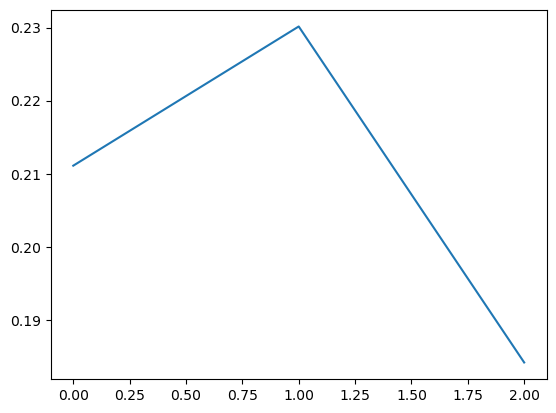

In [40]:
plt.plot(model_history1.history["accuracy"])

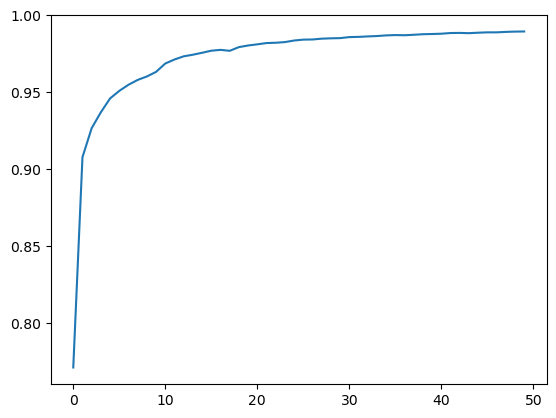

In [41]:
plt.plot(model_history2.history["accuracy"])

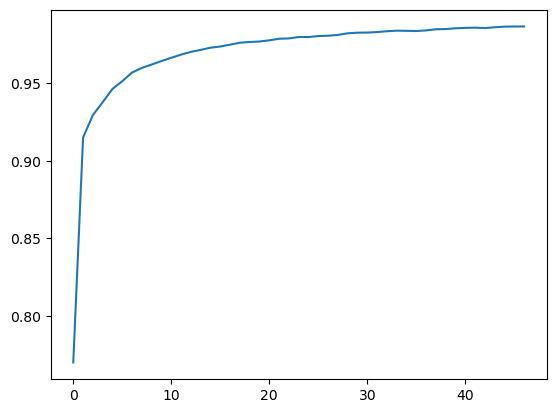

In [42]:
plt.plot(model_history3.history["accuracy"])

In [43]:
def show_predictions(unet = unet, dataset=None, num=1):
    """
    Displays the first image of each of the num batches
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = unet.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(unet.predict(sample_image[tf.newaxis, ...]))])

2/2 [==============================] - 3s 14ms/step


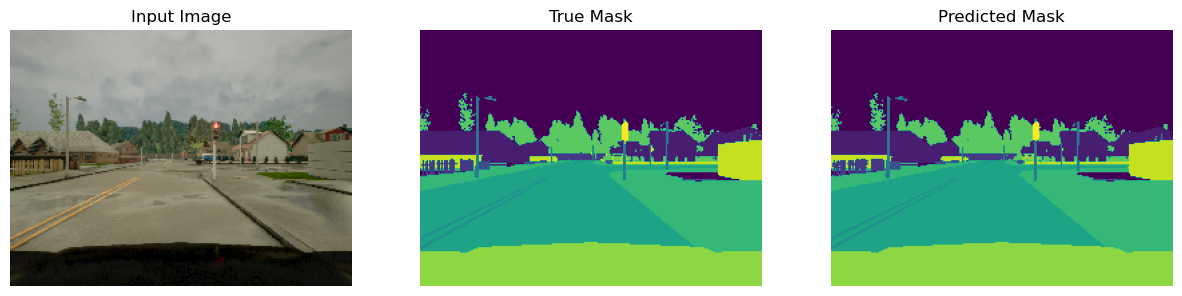

2/2 [==============================] - 0s 101ms/step


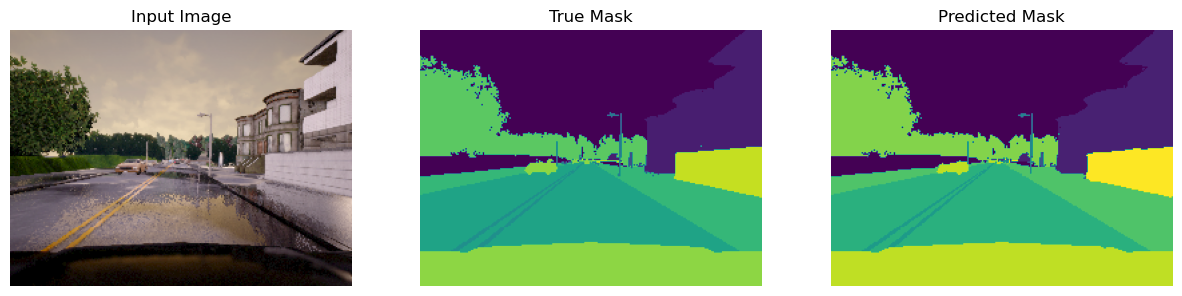

2/2 [==============================] - 0s 101ms/step


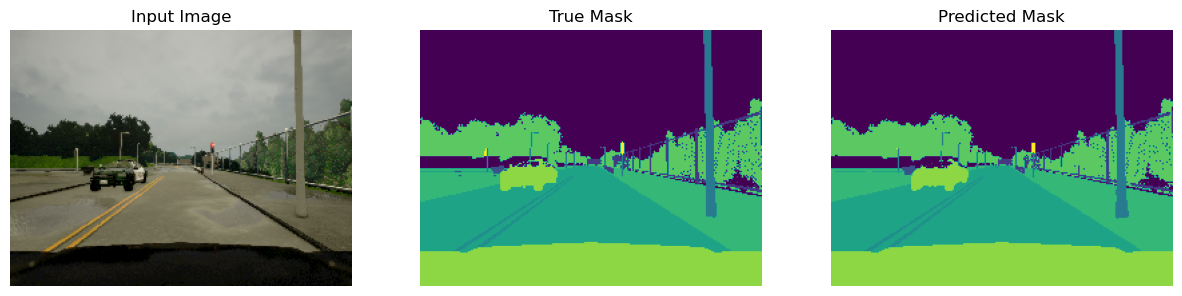

2/2 [==============================] - 0s 101ms/step


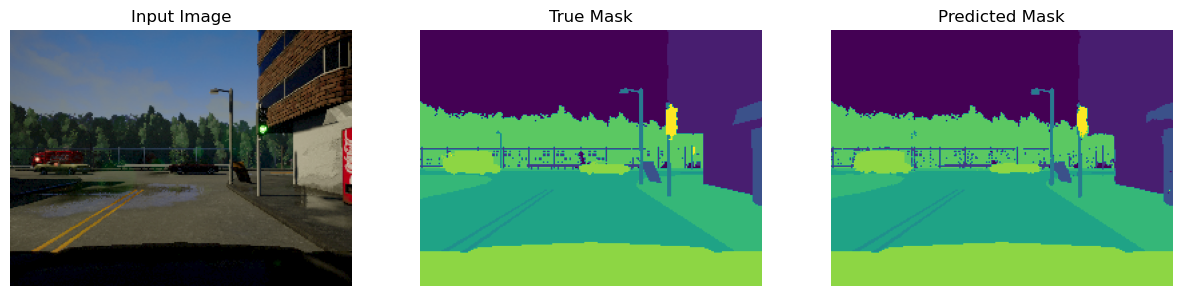

2/2 [==============================] - 0s 102ms/step


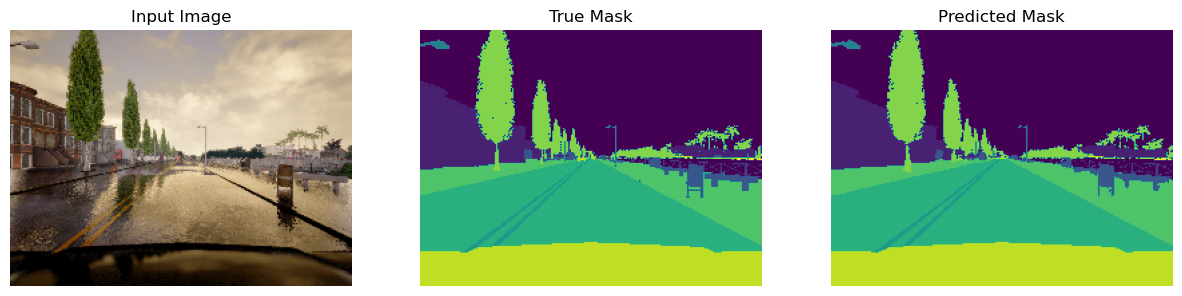

2/2 [==============================] - 0s 101ms/step


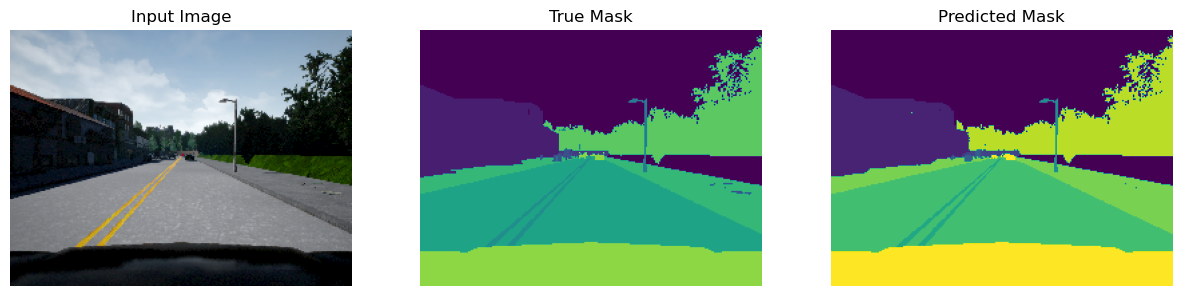

In [44]:
show_predictions(unet3,train_dataset, 6)

As you can see our last model does a brilliant job 

In [45]:
tf.keras.models.save_model(unet3, '/kaggle/working/model.h5')

In [46]:
import zipfile
import os
from IPython.display import FileLink

def zip_dir(directory = os.curdir, file_name = 'model.zip'):
    """
    zip all the files in a directory

    Parameters
    _____
    directory: str
        directory needs to be zipped, defualt is current working directory

    file_name: str
        the name of the zipped file (including .zip), default is 'directory.zip'

    Returns
    _____
    Creates a hyperlink, which can be used to download the zip file)
    """
    os.chdir(directory)
    zip_ref = zipfile.ZipFile(file_name, mode='w')
    for folder, _, files in os.walk(directory):
        for file in files:
            if file_name in file:
                pass
            else:
                zip_ref.write(os.path.join(folder, file))

    return FileLink(file_name)

In [47]:
zip_dir()

/kaggle/working/model.zip